## Exercise 1

In [2]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py", "thinkdsp.py")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, Wave, zero_pad
import scipy.signal
import pandas as pd
PI2 = np.pi * 2

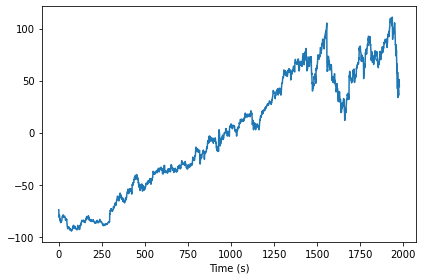

In [4]:
df = pd.read_csv('Res/FB_2.csv', header=0, parse_dates=[0])
ys = df['Close']
in_wave = Wave(ys, framerate=1)
in_wave.unbias()
in_wave.plot()
decorate(xlabel='Time (s)')

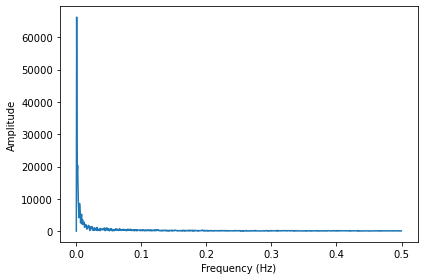

In [5]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

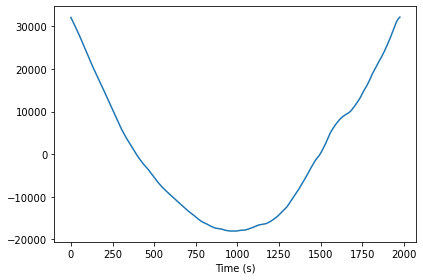

In [6]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

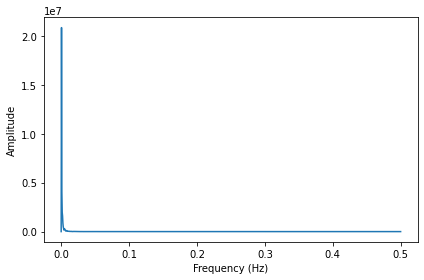

In [7]:
out_spectrum = out_wave.make_spectrum()
out_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

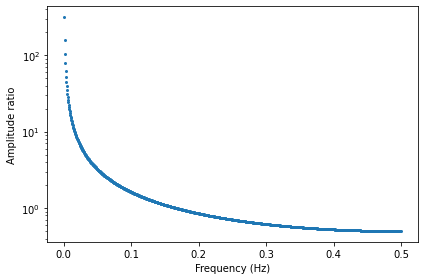

In [8]:
ratio_spectrum = out_spectrum.ratio(in_spectrum, thresh=1)
ratio_spectrum.plot(marker='.', ms=4, ls='')

decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')

In [9]:
# compute the diff filter
diff_window = np.array([1.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

# compute the cumsum filter by inverting the diff filter
cumsum_filter = diff_filter.copy()
cumsum_filter.hs[1:] = 1 / cumsum_filter.hs[1:]
cumsum_filter.hs[0] = np.inf

# compute the integration filter
integ_filter = cumsum_filter.copy()
integ_filter.hs[1:] = integ_filter.framerate / (PI2 * 1j * integ_filter.fs[1:])
integ_filter.hs[0] = np.inf

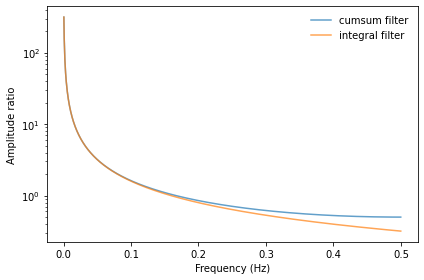

In [10]:
cumsum_filter.plot(label='cumsum filter', alpha=0.7)
integ_filter.plot(label='integral filter', alpha=0.7)

decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')

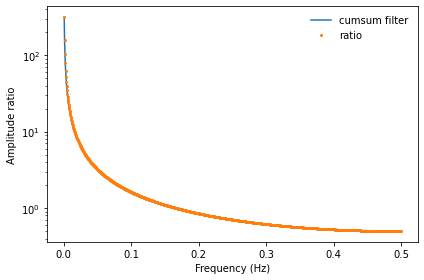

In [11]:
cumsum_filter.plot(label='cumsum filter')
ratio_spectrum.plot(label='ratio', marker='.', ms=4, ls='')
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')

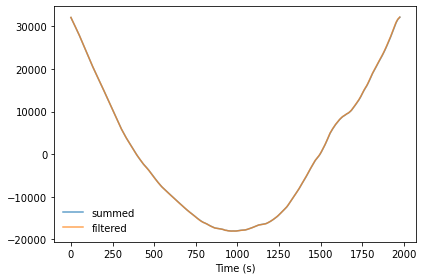

In [12]:
out_wave.plot(label='summed', alpha=0.7)

cumsum_filter.hs[0] = 0
out_wave2 = (in_spectrum * cumsum_filter).make_wave()
out_wave2.plot(label='filtered', alpha=0.7)

decorate(xlabel='Time (s)')

## Exercise 2

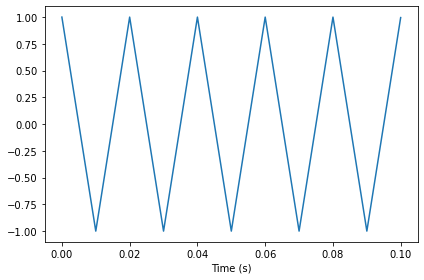

In [13]:
from thinkdsp import TriangleSignal

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

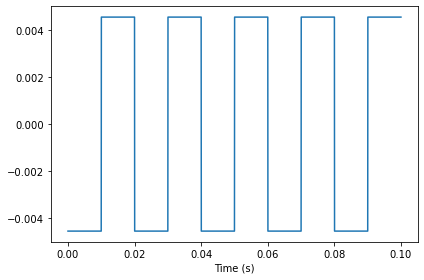

In [14]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

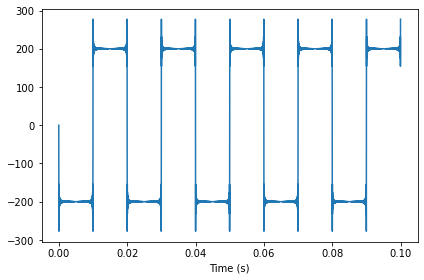

In [15]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

## Exercise 3

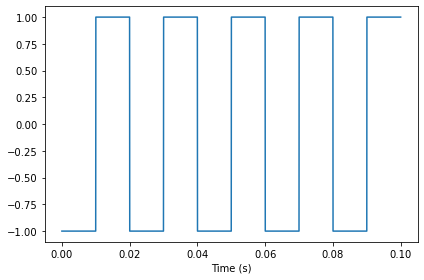

In [16]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

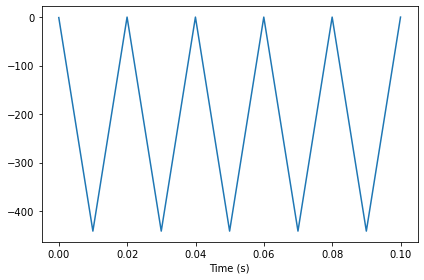

In [17]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

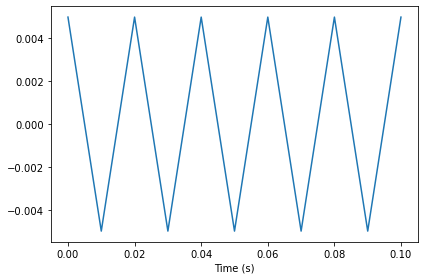

In [18]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

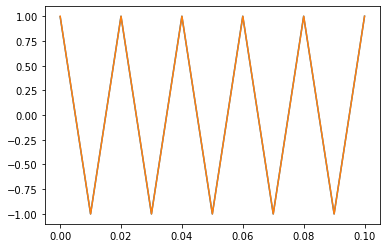

In [19]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

## Exercise 4

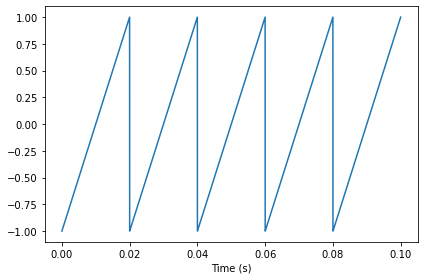

In [20]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

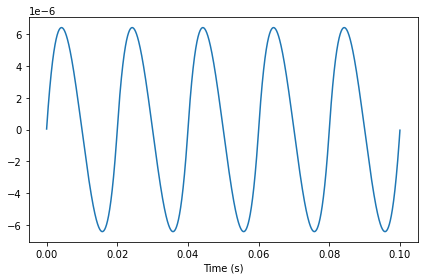

In [21]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

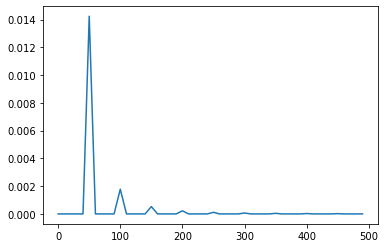

In [22]:
out_wave2.make_spectrum().plot(high=500)

## Exercise 5

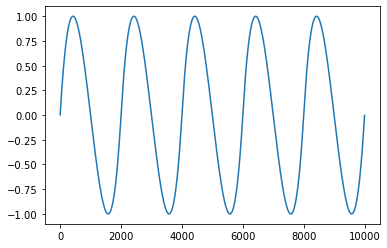

In [23]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

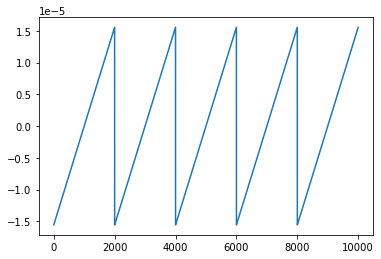

In [24]:
out_wave = in_wave.diff()
out_wave = out_wave.diff()
out_wave.plot()

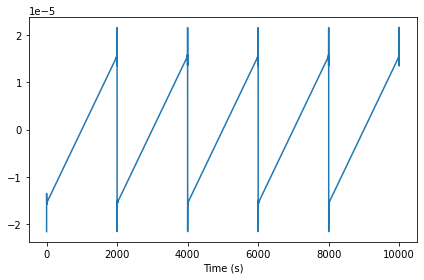

In [25]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

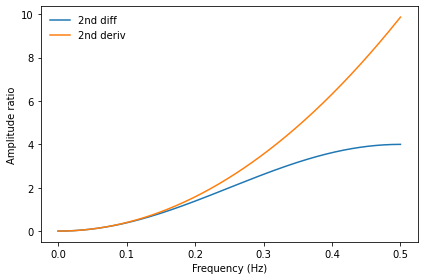

In [26]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2


diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')
